# MapMyRun Data

Import Packages

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 

import seaborn as sns 
sns.set()
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

## Using AWS SQL DB

In [2]:
#%pip install sshtunnel
%pip install peewee

Note: you may need to restart the kernel to use updated packages.


In [3]:
import peewee
from peewee import *

In [4]:
%pip install pymyssql

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pymyssql (from versions: none)
ERROR: No matching distribution found for pymyssql


In [5]:
import pymysql.cursors
import os
from sshtunnel import SSHTunnelForwarder
import pymysql
import django
#import MySQLdb
import mysql.connector

In [6]:
# #Using Environment Variables to connect to the database
# host = os.getenv('AWShost')
# user = os.getenv('AWSUN')
# passwd = os.getenv('AWSPW')
# db = os.getenv('AWSdb')
# port = os.getenv('AWSport')

In [7]:
# import os

# if 'RDS_HOSTNAME' in os.environ:
#     DATABASES = {
#         'default': {
#             'ENGINE': 'django.db.backends.mysql',
#             'NAME': os.environ['AWSdb'],
#             'USER': os.environ['AWSUN'],
#             'PASSWORD': os.environ['AWSPW'],
#             'HOST': os.environ['AWShost'],
#             'PORT': os.environ['AWSport'],
#         }
#     }

In [8]:
# #Install pymysql package
# %pip install pymysql

# #Import pymysql package to do database programming with Python. Here we set the values for varaiables
# #database_instance_endpoint = the db endpoint from AWS RDS Interface
# #port = 3306 which is the port for MySQL
# #user = the Master Username defined in AWS RDS DB
# #password = password defined when creating DB
# import pymysql
# database_instance_endpoint=host
# port=port
# dbname=db
# user=user
# password=passwd

# # Now we will connect to the AWS RDS Database using the command pymysql.connect with the Database details from above.
# # Then we store this value in the variable "connection"
# connection = pymysql.connect(database_instance_endpoint,
#                       user = user,
#                       port = port,
#                       passwd = password,
#                       database = dbname)

# # Declare varaiable for mycur which is a cursor. We need a cursor to query the database
# # Using cursor, we can connect to the database
# mycur = connection.cursor()

# # Using MySQL query to create a new table called "students" with columns: id, firstname, lastname, grade with id as PRIMARY KEY
# # Store the MySQL command in a variable "create_table_query"
# create_table_query="""CREATE TABLE IF NOT EXISTS `students` (
#                     `id` int(11) NOT NULL AUTO_INCREMENT,
#                     `firstname` varchar(255) NOT NULL,`lastname` varchar(255) NOT NULL,`grade` varchar(10),
#                      PRIMARY KEY (`id`)
#                      ) ENGINE=INNODB;"""

# # Using cursor to execute the command to create the table				
# mycur.execute(create_table_query)

# # Using MySQL command to insert a data row into the students table.
# # Keey this MySQL command in the variable "insert_query"
# insert_query="INSERT INTO `students` (`id`, `firstname`, `lastname`) VALUES (%s, %s, %s)"

# # Using cursor to execute the insert query command to add more data into the table
# mycur.execute(insert_query, ('12345', 'Tata', 'Tutu'))
# mycur.execute(insert_query, ('34567', 'Momo', 'Meme'))

# # Run the commit command to commit the change into the database
# connection.commit()

# # Check the result by query all the data from the students table
# mycur.execute("SELECT * FROM students")

# # Run the command to display the database table
# mycur.fetchall()

In [9]:
# import pymysql

# connection = pymysql.connect(host=host,user=user,password=passwd,database=db,charset='utf8mb4',cursorclass=pymysql.cursors.DictCursor)


# cursor = connection.cursor()
# cursor.execute("SELECT VERSION()")
# data = cursor.fetchone()
# print ("Database version : %s " % data)

In [10]:
# import pymysql

# connection = pymysql.connect(host=host,user=user,password=passwd,database=db,charset='utf8mb4',cursorclass=pymysql.cursors.DictCursor, port = 3306)


# cursor = connection.cursor()
# cursor.execute("SELECT VERSION()")
# data = cursor.fetchone()
# print ("Database version : %s " % data)

In [11]:
#%pip install boto3

In [12]:
# import mysql.connector
# import sys
# import boto3
# import os

# ENDPOINT= host
# PORT="3306"
# USER=user
# REGION="us-east-2"
# DBNAME=db
# os.environ['LIBMYSQL_ENABLE_CLEARTEXT_PLUGIN'] = '1'

# #gets the credentials from .aws/credentials
# session = boto3.Session(profile_name='default')
# client = session.client('rds')

# token = client.generate_db_auth_token(DBHostname=ENDPOINT, Port=PORT, DBUsername=USER, Region=REGION)

# try:
#     conn =  mysql.connector.connect(host=ENDPOINT, user=USER, passwd=token, port=PORT, database=DBNAME, ssl_ca='SSLCERTIFICATE')
#     cur = conn.cursor()
#     cur.execute("""SELECT now()""")
#     query_results = cur.fetchall()
#     print(query_results)
# except Exception as e:
#     print("Database connection failed due to {}".format(e))    

In [13]:
# print(passwd)

In [14]:
# def start_rds_connection():
#     try:
#         connection = pymysql.connect(host=host,
#                                      port=port,
#                                      user=user,
#                                      passwd=passwd,
#                                      db=db,
#                                      cursorclass=CURSORCLASS,
#                                      ssl_ca=SSL_CA)
#         print('[+] RDS Connection Successful')
#     except Exception as e:
#         print(f'[-] RDS Connection Failed: {e}')
#         connection = None

#     return connection

In [15]:
# import pymysql 
# conn = pymysql.connect(host=host,user=user,password=passwd,database=db)

In [16]:
# cur = conn.cursor()

In [17]:
# # !/usr/bin/env python
# # -*- coding: utf-8 -*-
# import pymysql

# host = host
# user = user
# password = passwd
# database = db

# connection = pymysql.connect(host, user, password, database)
# with connection:
#     cur = connection.cursor()
#     cur.execute("SELECT VERSION()")
#     version = cur.fetchone()
#     print("Database version: {} ".format(version[0]))

In [18]:
# # SSH (ec2_public_dns, ec2_user, pem_path, remote_bind_address=(rds_instance_access_point, port))
# with SSHTunnelForwarder(('database-2.c4eszdapvtut.us-east-2.rds.amazonaws.com'), ssh_username="admin", ssh_pkey=passwd, remote_bind_address=('database-2.c4eszdapvtut.us-east-2.rds.amazonaws.com', 3306)) as tunnel:
#     print("****SSH Tunnel Established****")

In [19]:
# mydb = pymysql.connect(
#     host=host,
#     user=user,
#     passwd=passwd,
#     database="database-2",
#     port=3306
#     )

## Using Oracle DB

In [20]:
%pip install cx-Oracle

Note: you may need to restart the kernel to use updated packages.


In [21]:
# import cx_Oracle

# connection = cx_Oracle.connect('user/passwd@localhost:33060/database-2')
# cursor = connection.cursor()
# #connection.close()

## using duckdb

In [22]:
#%pip install PiML

In [23]:
from piml import Experiment

In [24]:
from fugue_notebook import setup
import fugue_duckdb
import os
import duckdb
setup()

<IPython.core.display.Javascript object>

In [25]:
con = duckdb.connect(database =':memory:')

## Using my github repo

In [26]:
temp = pd.read_csv(r'https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv')
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date Submitted          690 non-null    object 
 1   Workout Date            690 non-null    object 
 2   Activity Type           690 non-null    object 
 3   Calories Burned (kCal)  690 non-null    int64  
 4   Distance (mi)           690 non-null    float64
 5   Workout Time (seconds)  690 non-null    int64  
 6   Avg Pace (min/mi)       690 non-null    float64
 7   Max Pace                690 non-null    float64
 8   Avg Speed (mi/h)        690 non-null    float64
 9   Max Speed               690 non-null    float64
 10  Avg Heart Rate          455 non-null    float64
 11  Steps                   666 non-null    float64
 12  Notes                   690 non-null    object 
 13  Source                  690 non-null    object 
 14  Link                    690 non-null    ob

In [27]:
temp.to_csv('df.csv', index=False)

In [28]:
#write my cell magic line to the notebook
%%fsql duck

UsageError: Line magic function `%%fsql` not found.


In [29]:
#test out my SQL query
table = con.execute('SELECT * FROM df.csv').fetchdf();


In [30]:
table.head(1)

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace,Avg Speed (mi/h),Max Speed,Avg Heart Rate,Steps,Notes,Source,Link
0,"June 19, 2022","June 19, 2022",Run,378,2.66,1800,11.2782,0.0,5.32,0.0,NaN,4713.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6658125994


In [31]:
table.columns

Index(['Date Submitted', 'Workout Date', 'Activity Type',
       'Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace', 'Avg Speed (mi/h)', 'Max Speed',
       'Avg Heart Rate', 'Steps', 'Notes', 'Source', 'Link'],
      dtype='object')

In [32]:
#Apply the TRIM function to column headers to remove leading and trailing spaces
#Use SQL to establish the dataframe I want to work with
df = con.execute('SELECT TRIM(BOTH ' ' FROM "Date Submitted")  AS Date_Trim, "Workout Date" AS Workout_Date, TRIM(BOTH ' ' FROM "Activity Type")  AS Activity, "Calories Burned (kCal)" AS Total_Calories, "Distance (mi)" AS Distance, "Workout Time (Seconds)" AS Seconds, "Avg Pace (min/mi)" AS Avg_Pace, "Max Pace" AS Max_Pace, "Avg Speed (mi/h)" AS Avg_Speed, "Max Speed" AS Max_Speed, "Avg Heart Rate" AS Average_Heart_Rate, Steps, Notes, Source, Link FROM df.csv WHERE Distance > 0').fetchdf()
df.head(5)

,Date_Trim,Workout_Date,Activity,Total_Calories,Distance,seconds,Avg_Pace,Max_Pace,Avg_Speed,Max_Speed,Average_Heart_Rate,Steps,Notes,Source,Link
0,"June 19, 2022","June 19, 2022",Run,378,2.66000,1800,11.27820,0.00000,5.32000,0.0000,NaN,4713.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6658125994
1,"June 18, 2022","June 18, 2022",Run,370,2.57857,1698,10.96610,1.11240,5.47140,53.9375,159.0,4431.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6655598125
2,"June 16, 2022","June 17, 2022",Run,315,2.33000,1391,9.94993,0.00000,6.03019,0.0000,NaN,3684.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6652076194
3,"June 15, 2022","June 15, 2022",Run,405,3.10000,1691,9.09140,0.00000,6.59965,0.0000,NaN,4520.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6649778854
4,"June 12, 2022","June 12, 2022",Run,428,3.09762,1955,10.51630,3.00814,5.70545,19.9459,0.0,5052.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6641879077


In [33]:
df.value_counts().sum()
df.columns

Index(['Date_Trim', 'Workout_Date', 'Activity', 'Total_Calories', 'Distance',
       'seconds', 'Avg_Pace', 'Max_Pace', 'Avg_Speed', 'Max_Speed',
       'Average_Heart_Rate', 'Steps', 'Notes', 'Source', 'Link'],
      dtype='object')

In [34]:
# df = con.execute('ALTER TABLE CHANGE COLUMN "Workout Date" TO "Date" FROM df.csv').fetchdf()
# df.head(1)

In [35]:
#get my table name
con.execute('SHOW TABLES')

In [36]:
df.describe()

,Total_Calories,Distance,seconds,Avg_Pace,Max_Pace,Avg_Speed,Max_Speed,Average_Heart_Rate,Steps
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,442.000000,666.000000
mean,408.187406,3.187186,2450.517241,13.508088,2.081515,5.645313,47.891159,109.918552,5517.382883
std,282.046856,1.926695,4796.220920,19.100333,7.659103,1.536980,135.104480,61.336976,9935.677622
min,2.000000,0.015731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,252.500000,2.034545,1480.000000,9.130750,0.000000,5.308200,0.000000,95.500000,3307.000000
50%,403.000000,3.100000,1800.000000,9.763800,0.872705,6.142910,19.237100,143.500000,4649.500000
75%,457.000000,3.557410,2341.000000,11.300550,1.690110,6.569745,60.548250,153.750000,5742.000000
max,2473.000000,13.481600,80568.000000,295.261503,182.396000,14.863700,1853.550000,169.000000,193886.000000


In [37]:
# headers_dict = {'Workout Date': 'Workout_Date', 'Avg Pace (min/mi)': 'Avg_Pace', 'Distance (mi)':'Distance', 'Avg Speed (mi/h)':'Avg_Speed', 'Avg Heart Rate':'Avg_Heart_Rate', 'Calories Burned (kCal)':'Calories_Burned', 'Workout Time (seconds)': 'Workout_Time', 'Max Pace (min/mi)':'Max_Pace', 'Max Pace':'Max_Pace', 'Date Submitted':'Date_Submitted', 'Activity Type':'Activity_Type', 'Max Speed (mi/h)':'Max_Speed'}
# temp.rename(columns = headers_dict, inplace=True)

In [38]:
df.columns

Index(['Date_Trim', 'Workout_Date', 'Activity', 'Total_Calories', 'Distance',
       'seconds', 'Avg_Pace', 'Max_Pace', 'Avg_Speed', 'Max_Speed',
       'Average_Heart_Rate', 'Steps', 'Notes', 'Source', 'Link'],
      dtype='object')

In [39]:
df['Workout_Date'] = pd.to_datetime(df['Workout_Date'])
df['Date_Trim'] = pd.to_datetime(df['Date_Trim'])
mean_HR = df['Average_Heart_Rate'].mean()
#temp['Avg_Heart_Rate'].fillna(value = mean_value, inplace = True)

#step_value = temp['Steps'].mean()
#temp['Steps'].fillna(value = step_value, inplace = True)
df['day_of_week']=df['Workout_Date'].dt.day_name()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date_Trim           667 non-null    datetime64[ns]
 1   Workout_Date        667 non-null    datetime64[ns]
 2   Activity            667 non-null    object        
 3   Total_Calories      667 non-null    int32         
 4   Distance            667 non-null    float64       
 5   seconds             667 non-null    int32         
 6   Avg_Pace            667 non-null    float64       
 7   Max_Pace            667 non-null    float64       
 8   Avg_Speed           667 non-null    float64       
 9   Max_Speed           667 non-null    float64       
 10  Average_Heart_Rate  442 non-null    float64       
 11  Steps               666 non-null    float64       
 12  Notes               667 non-null    object        
 13  Source              667 non-null    object        

In [40]:
df[df.Average_Heart_Rate == 0] = np.nan
#temp[temp.Max_Pace == 0] = np.nan


In [41]:
df['Average_Heart_Rate'].fillna(mean_HR, inplace = True)
#temp.fillna(temp.Max_Pace.median(), inplace = True)
df.head(1)

,Date_Trim,Workout_Date,Activity,Total_Calories,Distance,seconds,Avg_Pace,Max_Pace,Avg_Speed,Max_Speed,Average_Heart_Rate,Steps,Notes,Source,Link,day_of_week
0,2022-06-19,2022-06-19,Run,378.0,2.66,1800.0,11.2782,0.0,5.32,0.0,109.918552,4713.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6658125994,Sunday


In [42]:
temp_df = pd.DataFrame(df)
temp_df.drop(['Notes', 'Source', 'Link', 'Max_Speed', 'Max_Pace'], axis = 1, inplace = True)
#temp_df.rename(columns = headers_dict, inplace=True)
upd = temp_df.round(2)
upd2 =upd
upd3 = upd2[upd2['Avg_Pace'].between(6, 13)]
upd4 = upd3[upd3['Avg_Speed'] > 3]
upd4.sort_values(by=['Workout_Date'], ascending=True)
#upd5 = upd4[upd4['Avg_Pace'] < 13]
df = upd4[upd4['Activity'] == 'Run']
df['Calculated'] = df['seconds'] / 60
df.count()

Date_Trim             457
Workout_Date          457
Activity              457
Total_Calories        457
Distance              457
seconds               457
Avg_Pace              457
Avg_Speed             457
Average_Heart_Rate    457
Steps                 457
day_of_week           457
Calculated            457
dtype: int64

In [43]:
df['Workout_Date'] = pd.to_datetime(df['Workout_Date'])
#df.drop(['Max_Pace', 'Max Speed'])
df.sort_values(by=['Workout_Date'], ascending=False)

,Date_Trim,Workout_Date,Activity,Total_Calories,Distance,seconds,Avg_Pace,Avg_Speed,Average_Heart_Rate,Steps,day_of_week,Calculated
0,2022-06-19,2022-06-19,Run,378.0,2.66,1800.0,11.28,5.32,109.92,4713.0,Sunday,30.000000
1,2022-06-18,2022-06-18,Run,370.0,2.58,1698.0,10.97,5.47,159.00,4431.0,Saturday,28.300000
2,2022-06-16,2022-06-17,Run,315.0,2.33,1391.0,9.95,6.03,109.92,3684.0,Friday,23.183333
3,2022-06-15,2022-06-15,Run,405.0,3.10,1691.0,9.09,6.60,109.92,4520.0,Wednesday,28.183333
5,2022-06-10,2022-06-10,Run,881.0,6.20,4182.0,11.23,5.34,153.00,10479.0,Friday,69.700000
...,...,...,...,...,...,...,...,...,...,...,...,...
635,2019-07-05,2019-07-05,Run,156.0,1.52,843.0,9.24,6.49,160.00,2313.0,Friday,14.050000
637,2019-07-04,2019-07-04,Run,156.0,1.53,816.0,8.88,6.76,159.00,2215.0,Thursday,13.600000
639,2019-07-02,2019-07-02,Run,95.0,1.02,552.0,9.02,6.65,148.00,1439.0,Tuesday,9.200000
642,2019-06-29,2019-06-29,Run,118.0,1.27,693.0,9.13,6.57,150.00,1824.0,Saturday,11.550000


In [44]:
#set the location


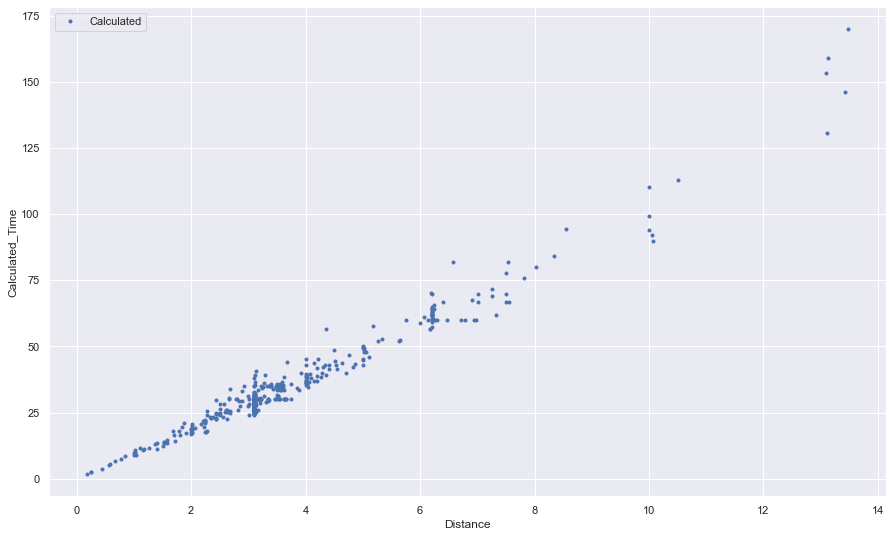

In [45]:
axes = df.plot(x='Distance', y='Calculated', style='.',figsize=(15,9))
y_label = axes.set_ylabel('Calculated_Time')

In [46]:
from scipy import stats

In [47]:
linear_regression = stats.linregress(x=df.Calculated,y=df.Distance)

In [48]:
linear_regression.slope

0.09104684340251788

In [49]:
linear_regression.intercept

0.44214729456341084

* We can use these values with the simple linear regression equation for a straight line to predict the average January temperature in New York City for any given year.
* In the following calculation, `linear_regression.slope` is **_m_**, our input year is **_x_** (the date value for which you’d like to predict the temperature), and `linear_regression.intercept` is **_b_**.
* We can also predict the approximate difference between one year and another.

In [50]:
Half = linear_regression.slope * 13.1 + linear_regression.intercept 
print(Half) 


1.634860943136395


In [51]:
Full = linear_regression.slope * 26.2 + linear_regression.intercept
print(Full-Half)

1.1927136485729841


### Plotting the Regression Line
* Seaborn’s **`regplot` function** plots each data point with one attribute on the **_x_****-axis and the other on the **_y_**-axis
* Creates a **scatter plot** or **scattergram** representing the `Temperature`s for the given `Date`s and adds the regression line
* Function `regplot`’s `x` and `y` keyword arguments are one-dimensional arrays of the same length representing the **_x-y_** coordinate pairs to plot

In [52]:
import seaborn as sns
sns.set_style('whitegrid')

(-11.715085831106412, 178.4959564681479)

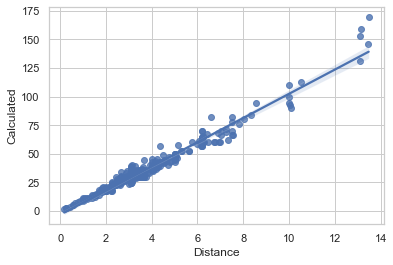

In [53]:
axes = sns.regplot(x=df.Distance, y=df.Calculated)
axes.set_ylim()

## EDA FOR PLOTTING


### summary statistics

In [54]:
df.head(1)


,Date_Trim,Workout_Date,Activity,Total_Calories,Distance,seconds,Avg_Pace,Avg_Speed,Average_Heart_Rate,Steps,day_of_week,Calculated
0,2022-06-19,2022-06-19,Run,378.0,2.66,1800.0,11.28,5.32,109.92,4713.0,Sunday,30.0


In [55]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 663
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date_Trim           457 non-null    datetime64[ns]
 1   Workout_Date        457 non-null    datetime64[ns]
 2   Activity            457 non-null    object        
 3   Total_Calories      457 non-null    float64       
 4   Distance            457 non-null    float64       
 5   seconds             457 non-null    float64       
 6   Avg_Pace            457 non-null    float64       
 7   Avg_Speed           457 non-null    float64       
 8   Average_Heart_Rate  457 non-null    float64       
 9   Steps               457 non-null    float64       
 10  day_of_week         457 non-null    object        
 11  Calculated          457 non-null    float64       
dtypes: datetime64[ns](2), float64(8), object(2)
memory usage: 46.4+ KB


In [56]:
df.columns

Index(['Date_Trim', 'Workout_Date', 'Activity', 'Total_Calories', 'Distance',
       'seconds', 'Avg_Pace', 'Avg_Speed', 'Average_Heart_Rate', 'Steps',
       'day_of_week', 'Calculated'],
      dtype='object')

<AxesSubplot:xlabel='Workout_Date'>

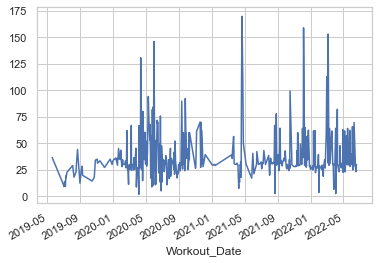

In [57]:
# show data of one subject
mask1 = df['Activity'] == 'Run'
(
    df[mask1]
    .set_index('Workout_Date')
    ['Calculated']
    .plot()
)

### plot the average of `Calculated` data


<AxesSubplot:xlabel='day_of_week'>

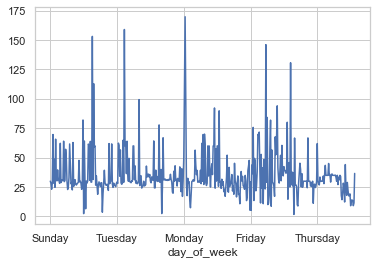

In [58]:
# basic approach to plot using matplotlib w/ chaining approach
(
    df
    .set_index('day_of_week')
    ['Calculated']
    .plot()
)

<AxesSubplot:xlabel='Workout_Date'>

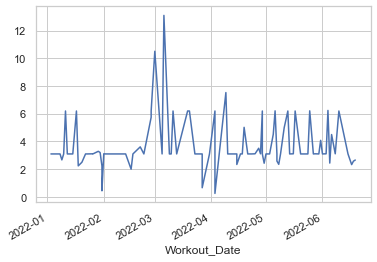

In [59]:
# check runs for 2022
(
    df
    .set_index('Workout_Date')
    .query('Workout_Date > 20220101')
    ['Distance']
    .plot()
)


In [60]:
# get the agg of a col
group = df.groupby(
    'Workout_Date').count(

    ).sort_values(
        by=['Workout_Date'],
         ascending=False)

In [61]:
group.head()

,Date_Trim,Activity,Total_Calories,Distance,seconds,Avg_Pace,Avg_Speed,Average_Heart_Rate,Steps,day_of_week,Calculated
Workout_Date,,,,,,,,,,,
2022-06-19,1,1,1,1,1,1,1,1,1,1,1
2022-06-18,1,1,1,1,1,1,1,1,1,1,1
2022-06-17,1,1,1,1,1,1,1,1,1,1,1
2022-06-15,1,1,1,1,1,1,1,1,1,1,1
2022-06-10,1,1,1,1,1,1,1,1,1,1,1


### correlation matrix / Pairplot


In [62]:
df.head(2)

,Date_Trim,Workout_Date,Activity,Total_Calories,Distance,seconds,Avg_Pace,Avg_Speed,Average_Heart_Rate,Steps,day_of_week,Calculated
0,2022-06-19,2022-06-19,Run,378.0,2.66,1800.0,11.28,5.32,109.92,4713.0,Sunday,30.0
1,2022-06-18,2022-06-18,Run,370.0,2.58,1698.0,10.97,5.47,159.00,4431.0,Saturday,28.3


In [63]:
df.columns


Index(['Date_Trim', 'Workout_Date', 'Activity', 'Total_Calories', 'Distance',
       'seconds', 'Avg_Pace', 'Avg_Speed', 'Average_Heart_Rate', 'Steps',
       'day_of_week', 'Calculated'],
      dtype='object')

### Heatmap - correlation


In [64]:
# show the correlation matrix
df.corr()


,Total_Calories,Distance,seconds,Avg_Pace,Avg_Speed,Average_Heart_Rate,Steps,Calculated
Total_Calories,1.000000,0.972871,0.970201,0.264479,-0.255492,0.003532,0.962922,0.970201
Distance,0.972871,1.000000,0.981401,0.213544,-0.208224,0.059593,0.983502,0.981401
seconds,0.970201,0.981401,1.000000,0.367492,-0.356460,0.092082,0.988465,1.000000
Avg_Pace,0.264479,0.213544,0.367492,1.000000,-0.989560,0.167866,0.322040,0.367492
Avg_Speed,-0.255492,-0.208224,-0.356460,-0.989560,1.000000,-0.190767,-0.317355,-0.356460
Average_Heart_Rate,0.003532,0.059593,0.092082,0.167866,-0.190767,1.000000,0.083889,0.092082
Steps,0.962922,0.983502,0.988465,0.322040,-0.317355,0.083889,1.000000,0.988465
Calculated,0.970201,0.981401,1.000000,0.367492,-0.356460,0.092082,0.988465,1.000000


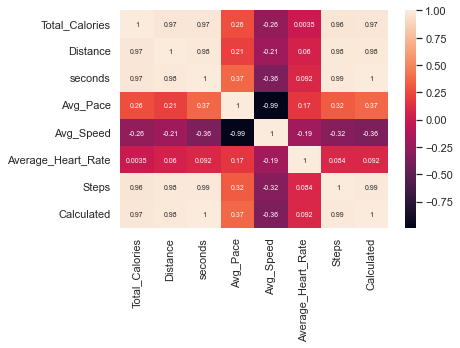

In [65]:
# Default heatmap
p1 = sns.heatmap(
    df
    .corr(),
    annot=True,
    annot_kws={"size": 7}
)


In [66]:
# show columns
df.columns


Index(['Date_Trim', 'Workout_Date', 'Activity', 'Total_Calories', 'Distance',
       'seconds', 'Avg_Pace', 'Avg_Speed', 'Average_Heart_Rate', 'Steps',
       'day_of_week', 'Calculated'],
      dtype='object')

In [67]:
# Linear regression b/w steps count and movement intensity
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# plot
sns.regplot(x=df["Calculated"], y=df["Calories_Burned"],
            line_kws={"color": "green", "alpha": 0.7, "lw": 5})
plt.show()


KeyError: 'Calories_Burned'

In [ ]:
# Linear regression b/w steps count and movement intensity
import seaborn as sns
import matplotlib.pyplot as plt

# plot
sns.regplot(x=df["Avg_Speed"], y=df["Calories_Burned"],
            line_kws={"color": "black", "alpha": 0.7, "lw": 5})
plt.show()


In [ ]:
df.columns

In [ ]:
mask1 = df['Steps'] == 0  # get the rows where steps count is 0
df[~mask1]['Steps'].hist(bins=100)


In [ ]:
df2 = df[['Workout_Date', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Avg_Speed',
       'Avg_Heart_Rate', 'Steps',
       'Calculated', 'day_of_week']]
df2.corr()

In [ ]:
df2.describe().round(2)

In [ ]:
df_num = df2.select_dtypes(include = ['float64', 'int64'])
df_num_corr = df_num.corr()['Distance'][:-1] # -1 means that the latest row is SalePrice
top_features = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There are {} strongly correlated values with Distance:\n{}".format(len(top_features), top_features))

In [ ]:
top_features.plot()

## **Looking for Correlations**


Before proceeding with the data cleaning, it is useful to establish a correlation between the response variable (in our case the sale price) and other predictor variables, as some of them might not have any major impact in determining the price of the house and will not be used in the analysis.  There are many ways to discover correlation between the target variable and the rest of the features. Building pair plots, scatter plots, heat maps, and a correlation matrixes are the most common ones. Below, we will use the `corr()` function to list the top features based on the [pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) (measures how closely two sequences of numbers are correlated). Correlation coefficient can only be calculated on the numerical attributes (floats and integers), therefore, only the numeric attributes will be selected.


Next, let's generate some par plots to visually inspect the correlation between some of these features and the target variable. We will use seaborns `sns.pairplot()` function for this analysis. Also, building pair plots is one of the possible ways to spot the outliers that might be present in the data.


In [ ]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Distance'])

From Pearsons Correlation Coefficients and pair plots, we can draw some conclusions about the features that are most strongly correlated to the 'SalePrice'. They are: 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', and others.


## **Log Transformation**


In this section, we are going to inspect whether our 'SalePrice' data are normally distributed. The assumption of the normal distribution must be met in order to perform any type of regression analysis. There are several ways to check for this assumption, however here, we will use the visual method, by plotting the 'Distance' distribution using the `distplot()` function from the `seaborn` library.


In [ ]:
df_untransformed = sns.distplot(df2['Distance'])

As the plot shows, 'Distance' deviates from the normal distribution. It has a longer tail to the right, so we call it a positive skew. In statistics *skewness* is a measure of asymmetry of the distribution. In addition to skewness, there is also a kurtosis, parameter which refers to the pointedness of a peak in the distribution curve. Both skewness and kurtosis are frequently used together to characterize the distribution of data.


In [ ]:
print("Skewness: %f" % df2['Distance'].skew())

The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0. In our case, we have \~1.7, so it is considered  highly skewed data.

Now, we can try to transform our data, so it looks more normally distributed. We can use the `np.log()` function from the `numpy` library to perform log transform. This [documentation](https://numpy.org/doc/stable/reference/generated/numpy.log.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) contains more information about the numpy log transform.


In [ ]:
log_transformed = np.log(df2['Distance'])

In [ ]:
df_transformed = sns.distplot(log_transformed)

As we can see, the log method transformed the 'Distance' distribution into a more symmetrical bell curve and the skewness level now is -0.01, well within the range.

There are other ways to correct for skewness of the data. For example, Square Root Transform (`np.sqrt`) and the Box-Cox Transform (`stats.boxcox` from the `scipy stats` library). To learn more about these two methods, please check out this [article](https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).


In [ ]:
print("Skewness: %f" % (log_transformed).skew())

In [ ]:
df2.index.is_unique

## **Feature Scaling**


One of the most important transformations we need to apply to our data is feature scaling.  There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

Min-max scaling (or normalization) is the simplest: values are shifted and rescaled so they end up ranging from 0 to 1. This is done by subtracting the min value and dividing by the max minus min.

Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation, so that the resulting distribution has unit variance.


In [ ]:
norm_data = MinMaxScaler().fit_transform(df_num)
norm_data

Note the data is now a `ndarray`


we can also standardize our data.


In [ ]:
scaled_data = StandardScaler().fit_transform(df_num)
scaled_data

## **Handling the Outliers**


### Finding the Outliers


In statistics, an outlier is an observation point that is distant from other observations. An outlier can be due to some mistakes in data collection or recording, or due to natural high variability of data points. How to treat an outlier highly depends on our data or the type of analysis to be performed. Outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

There are many ways to discover outliers in our data. We can do Uni-variate analysis (using one variable analysis) or Multi-variate analysis (using two or more variables). One of the simplest ways to detect an outlier is to inspect the data visually, by making box plots or scatter plots.


### Uni-variate Analysis


A box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles. Outliers may be plotted as individual points. To learn more about box plots please click [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).


In [ ]:
df2.columns

In [ ]:
sns.boxplot(x=df2['Distance'])

In [ ]:
sns.boxplot(x=df2['Avg_Speed'])

In [ ]:
sns.boxplot(x=df2['Avg_Heart_Rate'])

### Bi-variate Analysis


Next, we will look at the bi-variate analysis of the two features, the sale price, 'SalePrice', and the ground living area, 'GrLivArea', and plot the scatter plot of the relationship between these two parameters.


In [ ]:
price_area = df2.plot.scatter(x='Avg_Heart_Rate',
                      y='Avg_Pace')

### Deleting the Outliers


First, we will sort all of our 'Gr Liv Area' values and select only the last two.


In [ ]:
# df2.sort_values(by = 'Max Speed', ascending = False)[:2]

In [ ]:
# outliers_dropped = df.drop([df.index[[529,159]]])

## Z-score Analysis


Z-score is another way to identify outliers mathematically. Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. In another words, Z-score is the value that quantifies relationship between a data point and a standard deviation and mean values of a group of points. Data points which are too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used. For example, if the Z-score value is greater than or less than 3 or -3 standard deviations respectively, that data point will be identified as a outlier.

To learn more about Z-score, please visit this [Wikipedia](https://en.wikipedia.org/wiki/Standard_score?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) site.


Below, we are using Z-score function from `scipy` library to detect the outliers in our 'Low Qual Fin SF' parameter. To learn more about `scipy.stats`, please visit this [link](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).


In [ ]:
# df2['Distance'] = stats.zscore(df2['Distance'])
# df2[['Distance','Distance']].describe().round(3)

The scaled results show a mean of 0.000 and a standard deviation of 1.000, indicating that the transformed values fit the z-scale model. The max value of 5.084 is further proof of the presence of outliers, as it falls well above the z-score limit of +3.


### ML

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Check for null values before testing/training
df2.isnull().sum()

# Exploratory Data Analysis

In [ ]:
#Using the sample function pulls a random sample from the dataframe

sample = df.sample(n=10, replace=False)
print(sample.iloc[:,4:])

In [ ]:
sns.pairplot(df2,
hue='Distance', size=3)

In [ ]:
sns.jointplot(x=df2['Distance'],
y=df2['Avg_Pace'], kind='hex')

In [ ]:
# plot = sns.FacetGrid(df2, col='Distance',
# margin_titles=True)
# plot.map(plt.hist, 'Avg_Heart_Rate', color = 'red')

## EDA Part Two

In [ ]:
df2.head()

Let's find out how many entries there are in our dataset, using `shape` function.


In [ ]:
df2.shape

Using `info` function, we will take a look at our types of data.


In [ ]:
df2.info()

Using `columns` method, we will print all the column names.


In [ ]:
df2.columns

Below, we will check for any missing values.


In [ ]:
df2.isnull().sum()

## **Data Wrangling**

### Selecting and renaming the columns of interest


Below, we are filtering our data, by selecting only the relevant columns. Also, we are using the `rename()` method to change the name of the columns.


In [ ]:
df3 = (df2[['Workout_Date','Calories_Burned','Distance','Workout_Time', 'Avg_Pace', 'Avg_Speed', 'Avg_Heart_Rate', 'Steps', 'Calculated', 'day_of_week']]).rename(columns={"Calculated" : "Minutes"})
df3[['Minutes']] = df3[['Minutes']].round(2)
df3.head()

In [ ]:
# To create four separate plots, use Pandas `.hist` method
axList = df3.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Distribution')
        
    if ax.is_first_col():
        ax.set_ylabel('Count')
### END SOLUTION

In [ ]:
import seaborn as sns
sns.set_context('notebook')
# This uses the `.plot.hist` method
ax = df3.plot.hist(bins=20, alpha=0.5)
ax.set_xlabel('Category');
plt.title('Category Histogram')

## Pandas boxplot

Using Pandas, make a boxplot of each measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

In [ ]:
df3.boxplot(by='day_of_week')


## Barplot

In [ ]:
df3.head()

In [ ]:
df3['day_of_week']=df3['Workout_Date'].dt.day_name()
df3.head()

In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [ ]:
days = sns.barplot(x='day_of_week',y='Distance', data=df3)
plt.ylabel('Distance')
plt.xlabel('Day')
plt.xticks(rotation = 45)
plt.title('Avg_Distance by Day')
show_values(days)

In [ ]:
df3.columns

In [ ]:
sns.set_context("talk")

sns.barplot(y='Distance', x=pd.cut(
    df3['Minutes'], bins = 5),
    data=df2, ci=None)

plt.ylabel('Distance')
plt.xlabel('Minutes')
plt.xticks(rotation = 45)
plt.title('Minutes by Distance')

In [ ]:
pairplot = df3[['Distance', 'Steps', 'Minutes', 'Calories_Burned']]
sns.pairplot(pairplot, hue='Steps')

In [ ]:
import matplotlib.pyplot as plt
sns.set_context("poster")
jplot = sns.jointplot(x=df3['Distance'], y=df3['Minutes'], kind='hex')
#jplot.fig.suptitle('Minutes by Steps', loc = 'right', fontsize = 14)
plt.ylabel('Minutes', fontsize = 13)
plt.xlabel('Distance', fontsize = 13)
#plt.xticks(rotation = 45)
jplot.fig.set_figwidth(9)
jplot.fig.set_figheight(9)
plt.title('Minutes by Distance', y = 1.2, loc = 'left', fontsize = 14)


In [ ]:
sns.set(rc={"figure.figsize":(16, 16)}) #width=8, height=4
jbox = sns.boxplot(x = 'Distance', y='day_of_week', data=df3, orient = 'h', hue = (pd.cut(df3['Avg_Heart_Rate'], bins = 5)))
sns.set_theme(style="whitegrid")
plt.ylabel('Day of Week', fontsize=22)
plt.xlabel('Distance', fontsize=22)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 16)

## Parametric vs. Non-parametric

Parametric (finite number of distributions)

Non-parametric we make fewer assumptions

Maximum Likelihood Estimation: Related to probability and is a function of the parameters model.

Uniform distribution (uniform because there is an equal chance you will get any of the values as an output of the distribution)

Gaussian/Normal - Most likely value is the value closest to the mean. Further out values are equally unlikely.

Central limit theorum - take the average value from random samples. The distribution of those averages will be a normal curve. 

Log Normal - If you take the log of a variable you will have the normal distribution.

Exponential Curve - Most values closer to the left side. Often used to same what will be the amount of time before the next event.

Poisson - The number of events that happen during a certain amount of time. 

### Frequentist - Repeated observations in the limit.

Queueing theory - study of working with queues or lines. How much supply do we need to handle the demand (web servers for frequencies, waiters for customers at a restaurant)

Processes may have true frequencies - we are interested in modeling as many repeats of an experiment as possible. If the sample is large enough, we will have seen enough queues or lines to infer an estimate of our probabilities.

Derive the probalistic property of a procedure.

The more data we have the more confident we can be.

Apply the probability directly to the observed data.

### Bayesian - Describes parameters by probability distributions

Before seeing any data, a prior distribution is formulated. X amount of people in line at a certain time period will allow us to have an estimated guess.

Prior distributed is updated after seeing the data. Our initial estimate updates once data is introduced.

The updated data is referred to as posterior distribution.

Same math and same data - the differences is the interpretation.

In [ ]:
# sns.set_style('white')
# sns.set_context('notebook')
# sns.set_palette('dark')

# f = plt.figure(figsize=(6,4))
# sns.boxplot(x='Distance', y='Avg_Heart_Rate', 
#             hue='Avg_Pace', data=df2);

In [ ]:
df3.Avg_Heart_Rate.hist()

In [ ]:
df3.hist()

In [ ]:
from scipy.stats.mstats import normaltest
normaltest(df3.Distance.values)

In [ ]:
sns.set_context('talk')
sns.pairplot(df3, hue='Distance');

## Hypothesis Testing

## Interpretation and Prediction

Gather x, y; Train the model by finding the best prediction

Focus on 

## Transformation of Data Distribution

In [ ]:
from numpy import log
from scipy.stats import boxcox

# Machine Learning

## Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from helper import (plot_exponential_data, 
                    plot_square_normal_data)

import warnings
warnings.simplefilter("ignore")

In [ ]:
df3.head()


In [ ]:
df4 = df3.drop(['Workout_Date', 'day_of_week'], axis = 1)
df4.columns

#### Visually

Plotting a histogram:

In [ ]:
df4.Distance.hist()

Does not look normal due to that right tail. Let's try to verify statistically:

In [ ]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

Without getting into Bayesian vs. frequentist debates, for the purposes of this lesson, the following will suffice:

* This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say: 
    * This test outputs a "p-value". The _higher_ this p-value is the _closer_ the distribution is to normal.
    * Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.

In [ ]:
normaltest(df4.Distance.values)

p-value _extremely_ low. Our y variable we've been dealing with this whole time was not normally distributed!

Linear Regression assumes a normally distributed residuals which can be aided by transforming y variable. Let's try some common transformations to try and get y to be normally distributed: 

* Log
* Square root
* Box cox

### Testing log

The log transform can transform data that is significantly skewed right to be more normally distributed:

In [ ]:
log_dist = np.log(df4.Distance)

In [ ]:
log_dist.hist();

In [ ]:
normaltest(log_dist)

Conclusion: closer, but still not normal.

### Exercise: 

The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data:

In [ ]:
# Instructor Solution

sqrt_dist = np.sqrt(df4.Distance)
plt.hist(sqrt_dist)

### Box cox

The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.

In [ ]:
from scipy.stats import boxcox

In [ ]:
bc_result = boxcox(df4.Distance)
boxcox_dist = bc_result[0]
lam = bc_result[1]

In [ ]:
lam

In [ ]:
df4['Distance'].hist();

In [ ]:
plt.hist(boxcox_dist);

In [ ]:
normaltest(boxcox_dist)

Significantly more normally distributed (according to p value) than the other two distributions - above 0.05, even!

Now that we have a normally distributed y-variable, let's try a regression!

### Testing regression:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [ ]:
lr = LinearRegression()

In [ ]:
y_col = "Distance"

X = df4.drop(y_col, axis=1)
y = df4[y_col]

**Create Polynomial Features**

In [ ]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

**Train test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)

**Fit `StandardScaler` on `X_train` as before**

In [ ]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [ ]:
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

As before, we'll now:

1. Fit regression
1. Transform testing data
1. Predict on testing data

In [ ]:
y_train_bc.shape

In [ ]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

### Discussion

* Are we done?
* What did we predict?
* How would you interpret these predictions?

#### Inverse transform

Every transformation has an inverse transformation. The inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$, for example. Box cox has an inverse transformation as well: notice that we have to pass in the lambda value that we found from before:

In [ ]:
from scipy.special import inv_boxcox

In [ ]:
# code from above
bc_result = boxcox(df4.Distance)
boxcox_dist = bc_result[0]
lam = bc_result[1]

In [ ]:
inv_boxcox(boxcox_dist, lam)[:10]

In [ ]:
df4['Distance'].values[:10]

In [ ]:
# Instructor Solution
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_pred_tran,y_test)

## LAB Exercise: 

### Determine the R^2 of a LinearRegression without the box cox transformation. Is it higher or lower?

In [ ]:
### BEGIN SOLUTION
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(lr_pred,y_test)
### END SOLUTION

In [ ]:
normaltest(sqrt_dist)

## Train / Test Models

In [ ]:
mask = df4.dtypes == np.object
categorical_cols = df4.columns[mask]

In [ ]:
# Determine how many extra columns would be created
import numpy as np
num_ohc_cols = (df4[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = df4.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [ ]:
# Column difference is as calculated above
data_ohc.shape[1] - df4.shape[1]

In [ ]:
from sklearn.model_selection import train_test_split

y_col = 'Distance'

# Split the data that is not one-hot encoded
feature_cols = [x for x in df4.columns if x != y_col]
X_data = df4[feature_cols]
y_data = df4[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)
# Split the data that is one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, 
                                                    test_size=0.3, random_state=42)

In [ ]:
# Compare the indices to ensure they are identical
(X_train_ohc.index == X_train.index).all()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='no enc'))

# Data that have been one-hot encoded
LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},
                          name='one-hot enc'))

# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

In [ ]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler(),
           'maxabs': MaxAbsScaler()}

training_test_sets = {
    'not_encoded': (X_train, y_train, X_test, y_test),
    'one_hot_encoded': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc)}


# Get the list of float columns, and the float data
# so that we don't scale something we already scaled. 
# We're supposed to scale the original data each time
mask = X_train.dtypes == np.float
float_columns = X_train.columns[mask]

# initialize model
LR = LinearRegression()

# iterate over all possible combinations and get the errors
errors = {}
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        trainingset = _X_train.copy()  # copy because we dont want to scale this more than once.
        testset = _X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        LR.fit(trainingset, _y_train)
        predictions = LR.predict(testset)
        key = encoding_label + ' - ' + scaler_label + 'scaling'
        errors[key] = mean_squared_error(_y_test, predictions)

errors = pd.Series(errors)
print(errors.to_string())
print('-' * 80)
for key, error_val in errors.items():
    print(key, error_val)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Distance', 
       ylabel='Predictions',
       title='Predictions vs Distance, using Linear Regression');

# Machine Learning Foundation

## Section 2, Part c: Cross Validation 

In [ ]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [ ]:
# verify the shape of the array (rows by a single column)
X = df4.drop('Distance', axis=1)
y = df4.Distance

In [ ]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [ ]:
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

In [ ]:
s = StandardScaler()
lr = LinearRegression()

In [ ]:
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

In [ ]:
kf

In [ ]:
predictions = cross_val_predict(estimator, X, y, cv=kf)

In [ ]:
r2_score(y, predictions)

In [ ]:
np.mean(scores) # almost identical!

In [ ]:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

In [ ]:
scores = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

In [ ]:
list(zip(alphas,scores))

In [ ]:
Lasso(alpha=1e-6).fit(X, y).coef_

In [ ]:
Lasso(alpha=1.0).fit(X, y).coef_

In [ ]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [ ]:
pf = PolynomialFeatures(degree=3)

scores = []
alphas = np.geomspace(0.06, 6.0, 20)
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)
    

In [ ]:
plt.semilogx(alphas, scores);

In [ ]:
# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

In [ ]:
pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(4, 20, 20)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

plt.plot(alphas, scores)

In [ ]:
# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

In [ ]:
df_importances = pd.DataFrame(zip(best_estimator.named_steps["make_higher_degree"].get_feature_names(),
                 best_estimator.named_steps["lasso_regression"].coef_,
))

In [ ]:
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))

In [ ]:
col_names_dict

In [ ]:
df_importances.sort_values(by=1)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 20, 30)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [ ]:
grid.fit(X, y)

In [ ]:
grid.best_score_, grid.best_params_

In [ ]:
y_predict = grid.predict(X)

In [ ]:
# This includes both in-sample and out-of-sample
r2_score(y, y_predict)

In [ ]:
# Notice that "grid" is a fit object!
# We can use grid.predict(X_test) to get brand new predictions!
grid.best_estimator_.named_steps['ridge_regression'].coef_

In [ ]:
grid.cv_results_

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setup the polynomial features
degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

# Extract the X- and Y- data from the dataframe 
X_data = df4[['Distance']]
Y_data = df4['Minutes']

# Create the features and fit the model
X_poly = pf.fit_transform(X_data)
lr = lr.fit(X_poly, Y_data)
Y_pred = lr.predict(X_poly)

# Plot the result
plt.plot(X_data, Y_data, marker='o', ls='', label='data', alpha=1)
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, marker='^', alpha=.5, label='predictions w/ polynomial features')
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');


In [ ]:
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

# The ridge regression model
rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

# The lasso regression model
lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)

# The plot of the predicted values
plt.plot(X_data, Y_data, marker='o', ls='', label='data')
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, label='linear regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_rr, label='ridge regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_lr, label='lasso regression', marker='^', alpha=.5)

plt.legend()

ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

In [ ]:
# let's look at the absolute value of coefficients for each model

coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = rr.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()
coefficients = coefficients.applymap(abs)

coefficients.describe()  # Huge difference in scale between non-regularized vs regularized regression

In [ ]:
colors = sns.color_palette()

# Setup the dual y-axes
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data
ax1.plot(lr.coef_.ravel(), 
         color=colors[0], marker='o', label='linear regression')

# Plot the regularization data sets
ax2.plot(rr.coef_.ravel(), 
         color=colors[1], marker='o', label='ridge regression')

ax2.plot(lassor.coef_.ravel(), 
         color=colors[2], marker='o', label='lasso regression')

# Customize axes scales
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25)

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));

In [ ]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [ ]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

In [ ]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Distance', 
       ylabel='Predicted Distance', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

In [ ]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

In [ ]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

In [ ]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower

In [ ]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

In [ ]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

In [ ]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Distance', 
       ylabel='Predicted Distance', 
       title='Linear Regression Results');

In [ ]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df

In [ ]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(eta0=1e-7, **parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD-learningrate'] = pd.Series(new_rmses)
rmse_df

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

### Train Test Split

In [ ]:
df4.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df4[['Distance']], df4['Avg_Pace'], random_state=0)

In [ ]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

# Train the model on the training set.
reg.fit(X_train, y_train)

In [ ]:
# Test the model on the testing set and evaluate the performance
score = reg.score(X_test, y_test)
print(score)

### Regression

In [ ]:
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.boxplot(x='Distance', y='Avg_Pace', data=df4)

In [ ]:
dummy_variables = pd.get_dummies(df4[['Distance','Avg_Pace','Calories_Burned']], drop_first=True)
dummy_variables.shape
(2394, 57)
dummy_variables.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler 

In [ ]:
num_features = df4[['Distance', 'Avg_Pace', 'Workout_Time', 'Calories_Burned']]
sc = MinMaxScaler()
num_features = sc.fit_transform(num_features)

In [ ]:
cat_features = dummy_variables.values
data = np.concatenate((cat_features, num_features), axis=1)
X = data[:, :data.shape[1]-1]
y = data[:, data.shape[1]-1]
print(X.shape)
print(y.shape)
(2394, 60)
(2394,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.linear_model import Ridge
#Create a ridge regressor object
ridge = Ridge(alpha=0.5)
#Train the model
ridge.fit(X_train, y_train)
#Evaluate the model
print('R-squared score (training):{:.3f}'.
format(ridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
.format(ridge.score(X_test, y_test)))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
#Create a GradientBoostingRegressor object
params = {'n_estimators': 600, 'max_depth': 5,
'learning_rate': 0.02, 'loss': 'ls'}
gbr = GradientBoostingRegressor(**params)
#Train the model
gbr.fit(X_train, y_train)
#Evaluate the model
print('R-squared score (training): {:.3f}'
.format(gbr.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
.format(gbr.score(X_test, y_test)))

## Data standardization

**Standardizing** data refers to transforming each variable so that it more closely follows a **standard** normal distribution, with mean 0 and standard deviation 1.

The [`StandardScaler`](http://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) object in SciKit Learn can do this.

**Generate X and y**:

In [ ]:
y_col = "Distance"

X = df4.drop(y_col, axis=1)
y = df4[y_col]

**Import, fit, and transform using `StandardScaler`**

In [ ]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_ss = s.fit_transform(X)

### Coefficients with and without scaling

In [ ]:
lr = LinearRegression()

y_col = "Distance"

X = df4.drop(y_col, axis=1)
y = df4[y_col]

In [ ]:
lr.fit(X, y)
print(lr.coef_) # min = -18

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
s = StandardScaler()
X_ss = s.fit_transform(X)

In [ ]:
lr2 = LinearRegression()
lr2.fit(X_ss, y)
print(lr2.coef_) # coefficients now "on the same scale"

In [ ]:
### BEGIN SOLUTION

# Part 1

# Decreasing regularization and ensuring convergence
las001 = Lasso(alpha = 0.001, max_iter=100000)

# Transforming training set to get standardized units
X_train_s = s.fit_transform(X_train)

# Fitting model to training set
las001.fit(X_train_s, y_train)

# Transforming test set using the parameters defined from training set
X_test_s = s.transform(X_test)

# Finding prediction on test set
y_pred = las001.predict(X_test_s)

# Calculating r2 score
print("r2 score for alpha = 0.001:", r2_score(y_pred, y_test))


# Part 2

# Using vanilla Linear Regression
lr = LinearRegression()

# Fitting model to training set
lr.fit(X_train_s, y_train)

# predicting on test set
y_pred_lr = lr.predict(X_test_s)

# Calculating r2 score
print("r2 score for Linear Regression:", r2_score(y_pred_lr, y_test))


# Part 3
print('Magnitude of Lasso coefficients:', abs(las001.coef_).sum())
print('Number of coeffients not equal to 0 for Lasso:', (las001.coef_!=0).sum())

print('Magnitude of Linear Regression coefficients:', abs(lr.coef_).sum())
print('Number of coeffients not equal to 0 for Linear Regression:', (lr.coef_!=0).sum())
### END SOLUTION

## L1 vs. L2 Regularization

As mentioned in the deck: `Lasso` and `Ridge` regression have the same syntax in SciKit Learn.
[`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
Now we're going to compare the results from Ridge vs. Lasso regression:

[`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
### BEGIN SOLUTION
# Decreasing regularization and ensuring convergence
r = Ridge(alpha = 0.001)
X_train_s = s.fit_transform(X_train)
r.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred_r = r.predict(X_test_s)

# Calculating r2 score
r.coef_
### END SOLUTION

In [ ]:
print(np.sum(np.abs(r.coef_)))
print(np.sum(np.abs(las001.coef_)))

print(np.sum(r.coef_ != 0))
print(np.sum(las001.coef_ != 0))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.3, 
                                                    random_state=72018)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_pred, y_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=72018)

In [ ]:
s = StandardScaler()
lr_s = LinearRegression()
X_train_s = s.fit_transform(X_train)
lr_s.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred_s = lr_s.predict(X_test_s)
r2_score(y_pred_s, y_test)

## Supervised Classifications

In [ ]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = df4.columns[:-1]
corr_values = df4[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [ ]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')
### END SOLUTION

## Log Regression Data Types

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df4['Distance'] = le.fit_transform(df4.Distance)
df4['Distance'].sample(5)
### END SOLUTION

In [ ]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = df4.columns[:-1]
corr_values = df4[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [ ]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')
### END SOLUTION

# Log Regression Part 2

In [ ]:
# set a random state
rs = 123

In [ ]:
bins = [0, 20, 30, 50, 100, 150]
labels = ['Short', 'Average', 'Long', 'Really Long', 'Too Long']
df4['Distances'] = pd.cut(df4['Minutes'], bins=bins, labels=labels)

In [ ]:
# pdbin = pd.qcut(df4['Minutes'], 3)
# bin_labels_10 = (['Short', 'Medium', 'Long'])
# df4['Minutes_q'] = pd.qcut(df4['Minutes'], q=[0, .33, .66, 1], labels = bin_labels_10)

In [ ]:
df4.head()

In [ ]:
df4.dtypes

In [ ]:
df4.head()

In [ ]:
feature_cols = list(df4.iloc[:, :-1].columns)
feature_cols

In [ ]:
df4.iloc[:, :-1].describe().round(2)

In [ ]:
df4.iloc[:, -1:].value_counts(normalize=True)

In [ ]:
sns.set()
pd1 = df4.iloc[:, -1:].value_counts().plot.bar()
pd1.plot(kind='bar')

In [ ]:
X_raw = df4.iloc[:, :-1]
y_raw = df4.iloc[:, -1:]

In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

In [ ]:
# # Scaling the raw input features
# X = scaler.fit_transform(X_raw)

In [ ]:
print(f"The range of feature inputs are within {X.min()} to {X.max()}")

In [ ]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

In [ ]:
# Encode the target variable
y = label_encoder.fit_transform(y_raw.values.ravel())

In [ ]:
np.unique(y, return_counts=True)

In [ ]:
# First, let's split the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

In [ ]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")

In [ ]:
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

In [ ]:
# L2 penalty to shrink coefficients without removing any features from the model
penalty= 'l2'
# Our classification problem is multinomial
multi_class = 'multinomial'
# Use lbfgs for L2 penalty and multinomial classes
solver = 'lbfgs'
# Max iteration = 1000
max_iter = 1000

In [ ]:
# Define a logistic regression model with above arguments
l2_model = LogisticRegression(random_state=rs, penalty=penalty, multi_class=multi_class, solver=solver, max_iter=max_iter)

In [ ]:
l2_model.fit(X_train, y_train)

In [ ]:
l2_preds = l2_model.predict(X_test)

In [ ]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [ ]:
evaluate_metrics(y_test, l2_preds)

In [ ]:
# L1 penalty to shrink coefficients without removing any features from the model
penalty= 'l1'
# Our classification problem is multinomial
multi_class = 'multinomial'
# Use saga for L1 penalty and multinomial classes
solver = 'saga'
# Max iteration = 1000
max_iter = 1000

In [ ]:
# Define a logistic regression model with above arguments
l1_model = LogisticRegression(random_state=rs, penalty=penalty, multi_class=multi_class, solver=solver, max_iter = 1000)

In [ ]:
l1_model.fit(X_train, y_train)

In [ ]:
l1_preds = l1_model.predict(X_test)

In [ ]:
odd_ratios = l1_model.predict_proba(X_test[:1, :])[0]
odd_ratios

In [ ]:
l1_model.predict(X_test[:1, :])[0]

In [ ]:
evaluate_metrics(y_test, l1_preds)

In [ ]:
cf = confusion_matrix(y_test, l1_preds)

In [ ]:
plt.figure(figsize=(16, 12))
ax = sns.heatmap(cf, annot=True) 
xticklabels=['Short', 'Average', 'Long', 'Really Long', 'Too Long']
yticklabels=['Short', 'Average', 'Long', 'Really Long', 'Too Long']
ax.set(title="Confusion Matrix");

In [ ]:
l1_model.coef_

In [ ]:
# Extract and sort feature coefficients
def get_feature_coefs(regression_model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(regression_model.coef_[label_index, :], columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

In [ ]:
# Get the coefficents for Class 1, Less Often
coef_dict = get_feature_coefs(l1_model, 1, feature_cols)

In [ ]:
visualize_coefs(coef_dict)

In [ ]:
# Coefficients for Class 2
coef_dict = get_feature_coefs(l1_model, 2, feature_cols)
visualize_coefs(coef_dict)

## Pairplot

In [ ]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# standard imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.metrics import *
# pipelines
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
# data preparation
from sklearn.preprocessing import *
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, RFECV
from sklearn.utils import resample
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE
# machine learning
from sklearn.linear_model import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor

In [ ]:
run_num = df4.select_dtypes(include = ['float64', 'int64'])
run_num_corr = run_num.corr()['Distance'][:-1]
top_features = run_num_corr[abs(run_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

In [ ]:
for i in range(0, len(run_num.columns), 5):
    sns.pairplot(data=run_num,
                x_vars=run_num.columns[i:i+5],
                y_vars=['Distance'])

In [ ]:
sp_untransformed = sns.distplot(df4['Distance'])

In [ ]:
print("Skewness: %f" % df4['Distance'].skew())

In [ ]:
log_transformed = np.log(df4['Distance'])

In [ ]:
sp_transformed = sns.distplot(log_transformed)

In [ ]:
print("Skewness: %f" % (log_transformed).skew())

In [ ]:
duplicate = df4[df4.duplicated(['Workout_Time'])]
duplicate

In [ ]:
df4.head()

In [ ]:
AHR0 = df4[['Avg_Heart_Rate']] < 0.1
AHR = df4[['Avg_Heart_Rate']].mean().round(2)
AHR

In [ ]:
X = df4.drop('Distance',axis=1)
y = df4.Distance
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
y_train.value_counts()

In [ ]:
y_train.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

In [ ]:
sns.pairplot(df4, vars = df4.columns[0:4])

In [ ]:
knn.fit(X=X_train, y=y_train)

In [ ]:
for column in df4:
    sns.displot(x=column, data=df4)

In [ ]:
df4.columns

In [ ]:
# Convert x column to numpy array
X = df4.loc[:, ['Calories_Burned']].values

In [ ]:
sns.displot(X, kind='kde')

In [ ]:
sns.displot(X, kde=True)

In [ ]:
import numpy as np
import seaborn as sns

#make this example reproducible
np.random.seed(0)

#create data
x = np.random.normal(size=1000)

#create normal distribution histogram
sns.displot(X)

In [ ]:
import numpy as np
import seaborn as sns

#make this example reproducible
np.random.seed(0)

#create data
#X = np.random.normal(size=1000)

#create normal distribution curve
sns.displot(X, kind='kde')

In [ ]:
import numpy as np
import seaborn as sns

#make this example reproducible
np.random.seed(0)

#create data
#x = np.random.normal(size=1000)

#create normal distribution curve
sns.displot(df4, x='Minutes', kde=True)

In [ ]:
sns.pairplot(data = df4, vars = df.columns[3:9], hue = 'Minutes')

In [ ]:
df4.info()